# Polynomial_sframe function

In [1]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = pd.DataFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = poly_sframe['power_1'].apply(lambda x: x**power)
    return poly_sframe

In [2]:
import pandas as pd

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(by=['sqft_living','price'])

In [3]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
poly15_data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,290.0,84100.0,24389000.0,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
15381,370.0,136900.0,50653000.0,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
860,380.0,144400.0,54872000.0,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38
18379,384.0,147456.0,56623104.0,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
4868,390.0,152100.0,59319000.0,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38


In [4]:
from sklearn import linear_model
import numpy as np

In [5]:
l2_small_penalty = 1.5e-5
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

# Q1

In [6]:
model.coef_[0]

124.87330648148992

In [7]:
# dtype_dict same as above
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# Q8

544.669404284
859.362630169
-755.39589856
1119.44572033


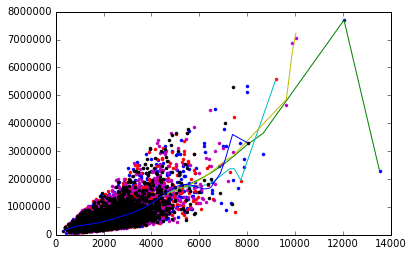

In [9]:
l2_small_penalty=1e-9
for i in (set_1,set_2,set_3,set_4):
    data = i
    poly_data = polynomial_sframe(data['sqft_living'], 15)
    model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
    model.fit(poly_data, data['price'])
    print(model.coef_[0])
    plt.plot(poly_data['power_1'],data['price'],'.',
            poly_data['power_1'], model.predict(poly_data),'-')

2.32806802958
2.09756902778
2.28906258119
2.08596194092


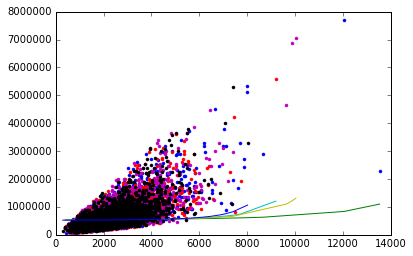

In [10]:
l2_large_penalty=1.23e2
for i in (set_1,set_2,set_3,set_4):
    data = i
    poly_data = polynomial_sframe(data['sqft_living'], 15)
    model = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
    model.fit(poly_data, data['price'])
    print(model.coef_[0])
    plt.plot(poly_data['power_1'],data['price'],'.',
            poly_data['power_1'], model.predict(poly_data),'-')

In [11]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [12]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


In [36]:
def kfold(k, l2_penalty, df, output):
    rss_total = 0
    n = len(df)
    for i in range(0,k-1):
        start = (n*i)/k
        end = (n*(i+1))/k
        val_set = df[start:end+1]
        train_set = df[0:start].append(df[end+1:n])
        poly_data = polynomial_sframe(train_set['sqft_living'], 15)
        poly_data_val = polynomial_sframe(val_set['sqft_living'], 15)
        model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
        model.fit(poly_data, train_set[output])
        y_pred = model.predict(poly_data_val)
        rss = sum((y_pred-val_set[output])**2)
        rss_total = rss_total + rss
    rss_avg = rss_total/k
    print(rss_avg)
    return(rss_avg)

In [37]:
l2_penalty = 10^3
k = 10
df = train_valid_shuffled
output = "price"
i=0
n = len(train_valid_shuffled)
start = (n*i)/k
end = (n*(i+1))/k
print(n)
print(start)
print(end)
val_set = df[start:end+1]
train_set = df[0:start].append(df[end+1:n])
print(len(val_set))
print(len(train_set))
print(val_set['price'])[0]
poly_data = polynomial_sframe(train_set['sqft_living'], 15)
poly_data_val = polynomial_sframe(val_set['sqft_living'], 15)
model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
model.fit(poly_data, train_set[output])
print(poly_data.head(1))
print(poly_data_val.head(1))
y_pred = model.predict(poly_data_val)
rss = sum((y_pred-val_set[output])**2)
print(rss)

19396
0
1939
1940
17456
665000.0
      power_1    power_2       power_3       power_4       power_5  \
1940   2890.0  8352100.0  2.413757e+10  6.975757e+13  2.015994e+17   

           power_6       power_7       power_8       power_9      power_10  \
1940  5.826222e+20  1.683778e+24  4.866119e+27  1.406308e+31  4.064231e+34   

          power_11      power_12      power_13      power_14      power_15  
1940  1.174563e+38  3.394487e+41  9.810067e+44  2.835109e+48  8.193466e+51  
   power_1    power_2       power_3       power_4       power_5       power_6  \
0   2800.0  7840000.0  2.195200e+10  6.146560e+13  1.721037e+17  4.818903e+20   

        power_7       power_8       power_9      power_10      power_11  \
0  1.349293e+24  3.778020e+27  1.057846e+31  2.961968e+34  8.293509e+37   

       power_12      power_13      power_14      power_15  
0  2.322183e+41  6.502111e+44  1.820591e+48  5.097655e+51  
1.92364365681e+14


In [43]:
k = 10
df = train_valid_shuffled
output = "price"
for penalty in np.logspace(3, 9, num=13):
    rss_avg = kfold(10,penalty,df,output)
    if penalty == np.logspace(3, 9, num=13)[0]:
        min_rss = rss_avg
    else:
        min_rss = min(min_rss, rss_avg)
print(min_rss)

2.33824870985e+14
2.34444733059e+14
2.34645644621e+14
2.34709679673e+14
2.34729979839e+14
2.34736404378e+14
2.34738436503e+14
2.34739079167e+14
2.34739282401e+14
2.34739346669e+14
2.34739366993e+14
2.3473937342e+14
2.34739375452e+14
2.33824870985e+14


In [47]:
model = linear_model.Ridge(alpha=np.logspace(3, 9, num=13)[0], normalize=True)
poly_data = polynomial_sframe(train_valid_shuffled['sqft_living'], 15)

model.fit(poly_data, train_valid_shuffled[output])

poly_data_test = polynomial_sframe(test['sqft_living'], 15)
y_pred = model.predict(poly_data_test)
rss = sum((y_pred-test[output])**2)
print(rss)

2.83856861224e+14


In [40]:
np.logspace(3, 9, num=13)

array([  1.00000000e+03,   3.16227766e+03,   1.00000000e+04,
         3.16227766e+04,   1.00000000e+05,   3.16227766e+05,
         1.00000000e+06,   3.16227766e+06,   1.00000000e+07,
         3.16227766e+07,   1.00000000e+08,   3.16227766e+08,
         1.00000000e+09])